<a href="https://colab.research.google.com/github/MOHAN-DATTA-24/Machine_Learning_G/blob/main/Multiple_Linear_Regression_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("multiple_linear_regression.csv")

In [3]:
data.head(10)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

**Data Processing**

In [7]:
data = data.dropna()
print("Shape of the data: ",data.shape)

Shape of the data:  (200, 4)


**Splitting data**

In [9]:
target_col = "Target"

In [14]:
# Input
x = data.iloc[:,data.columns != target_col]

# Output
y = data.loc[:,target_col]


In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state=42)

In [18]:
print(f"training data shape = {x_train.shape}")
print(f"validation data shape = {x_test.shape}")
print(f"training data target shape = {y_train.shape}")
print(f"validation data target shape = {y_test.shape}")

training data shape = (140, 3)
validation data shape = (60, 3)
training data target shape = (140,)
validation data target shape = (60,)


## **<font color = "green">Linear Regression</font>**



<h3><b>Training</b></h3>




In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr_model = LinearRegression()

In [21]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [22]:
lr_model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [23]:
lr_model.intercept_

2.7089490925159065

<h3><b>Prediction</b></h3>




In [24]:
test_predictions = lr_model.predict(x_test)

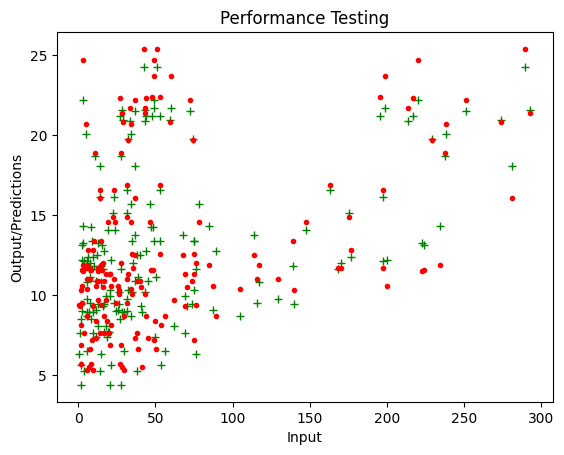

In [27]:
plt.plot(x_test, test_predictions, "+",color = "green")
plt.plot(x_test,y_test, ".",color = "red")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

<h3><b>Metrics</b></h3>




In [26]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test,test_predictions)
cost

3.79679723671522

## **<font color = "green">Assumptions of Linear Regression</font>**



##**HOMOSCEDASTICITY**

In [28]:
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [30]:
residuals = y_test - test_predictions   #error

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: Target, dtype: float64

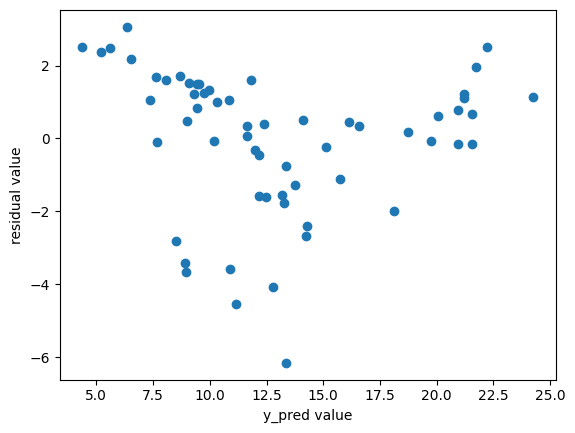

In [31]:
plt.scatter(test_predictions,residuals)
plt.xlabel("y_pred value")
plt.ylabel("residual value")
plt.show()

## Normality of the Residuals

In [32]:
import seaborn  as sns

<ipython-input-33-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Target', ylabel='Density'>

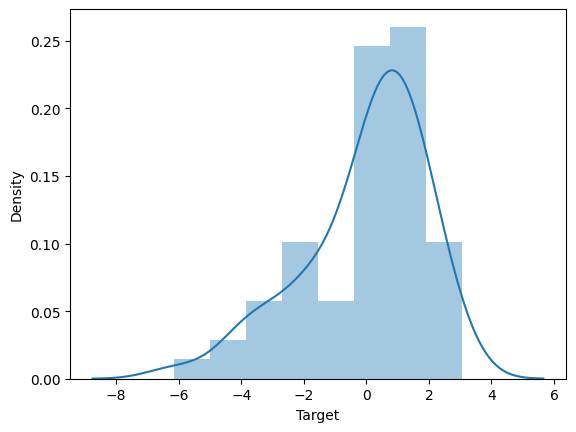

In [33]:
sns.distplot(residuals)

## **<font color = "green">Ordinary Least Square Method(OLS)</font>**



In [34]:
import statsmodels.api as sn

In [36]:
x_with_constant = sn.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
169,1.0,284.3,10.6,6.4
97,1.0,184.9,21.0,22.0
31,1.0,112.9,17.4,38.6
12,1.0,23.8,35.1,65.9
35,1.0,290.7,4.1,8.5
...,...,...,...,...
106,1.0,25.0,11.0,29.7
14,1.0,204.1,32.9,46.0
92,1.0,217.7,33.5,59.0
179,1.0,165.6,10.0,17.6


In [37]:
model = sn.OLS(y_train,x_with_constant)

In [38]:
result = model.fit()

In [39]:
result.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [42]:
lr_model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [43]:
lr_model.intercept_

2.7089490925159065

In [44]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.88e-69
Time:                        07:55:26   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

In [45]:
x_test = sn.add_constant(x_test)

In [46]:
y_pred = result.predict(x_test)
y_pred

95     16.565396
15     21.188228
30     21.551071
158    10.889238
128    22.202320
115    13.355569
69     21.196925
170     7.350285
174    13.275471
45     15.124495
66      9.014430
182     6.525428
165    14.302060
78      8.970260
186     9.456796
177    12.004544
56      8.915494
152    16.156193
82     10.295829
68     18.724736
124    19.768218
16     13.774690
148    12.496389
93     21.535018
65      7.608607
60      5.611980
84     20.917595
67     11.806277
125     9.080766
132     8.514120
9      12.176049
18      9.969194
55     21.730090
75     12.777706
150    18.101136
104    20.075908
135    14.262026
137    20.938265
164    10.839388
76      4.381906
79      9.513324
197    12.404863
38     10.170454
24      8.090814
122    13.163884
195     5.224355
29      9.288938
19     14.093307
143     8.690245
86     11.661198
114    15.718484
173    11.631569
5      13.353607
126    11.153147
117     6.336368
73      9.761580
140     9.419571
98     24.255165
172     7.6951